In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
from sklearn.datasets import load_iris

# Load Iris dataset (multiclass classification)
data = load_iris()
X = data.data
y = data.target

In [3]:
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset (binary classification)
bc_data = load_breast_cancer()
X_bc = bc_data.data
y_bc = bc_data.target

In [4]:
# Normalize the data for better performance
scaler = StandardScaler()

# For multiclass
X = scaler.fit_transform(X)

# For binary classification
X_bc = scaler.fit_transform(X_bc)

In [5]:
# For multiclass classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For binary classification
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

In [6]:
# Define model for multiclass classification
model_multiclass = Sequential()

model_multiclass.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_multiclass.add(Dense(32, activation='relu'))
model_multiclass.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the model
model_multiclass.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Define model for binary classification
model_binary = Sequential()

model_binary.add(Dense(64, input_dim=X_train_bc.shape[1], activation='relu'))
model_binary.add(Dense(32, activation='relu'))
model_binary.add(Dense(1, activation='sigmoid'))  # Binary output class

# Compile the model
model_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history_multiclass = model_multiclass.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5952 - loss: 0.9859 - val_accuracy: 0.7083 - val_loss: 0.9177
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7799 - loss: 0.7599 - val_accuracy: 0.8750 - val_loss: 0.8091
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8137 - loss: 0.6827 - val_accuracy: 0.9167 - val_loss: 0.7255
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7840 - loss: 0.6131 - val_accuracy: 0.8750 - val_loss: 0.6575
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8034 - loss: 0.5969 - val_accuracy: 0.8750 - val_loss: 0.5908
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7887 - loss: 0.5367 - val_accuracy: 0.8750 - val_loss: 0.5266
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8139 - loss: 0.4846 - val_accuracy: 0.8750 - val_loss: 0.4783
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8407 - loss: 0.4344 - val_accuracy: 0.

In [9]:
history_binary = model_binary.fit(X_train_bc, y_train_bc, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8236 - loss: 0.4971 - val_accuracy: 0.9231 - val_loss: 0.2416
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9473 - loss: 0.1647 - val_accuracy: 0.9451 - val_loss: 0.1576
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9659 - loss: 0.1128 - val_accuracy: 0.9341 - val_loss: 0.1318
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0677 - val_accuracy: 0.9560 - val_loss: 0.1172
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0759 - val_accuracy: 0.9451 - val_loss: 0.1144
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9788 - loss: 0.0578 - val_accuracy: 0.9341 - val_loss: 0.1094
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0339 - val_accuracy: 0.9341 - val_loss: 0.1077
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0455 - val_accuracy: 0.9341 - 

In [10]:
test_loss_multiclass, test_acc_multiclass = model_multiclass.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (Multiclass): {test_acc_multiclass}")

Test Accuracy (Multiclass): 1.0


In [11]:
test_loss_binary, test_acc_binary = model_binary.evaluate(X_test_bc, y_test_bc, verbose=0)
print(f"Test Accuracy (Binary): {test_acc_binary}")

Test Accuracy (Binary): 0.9649122953414917


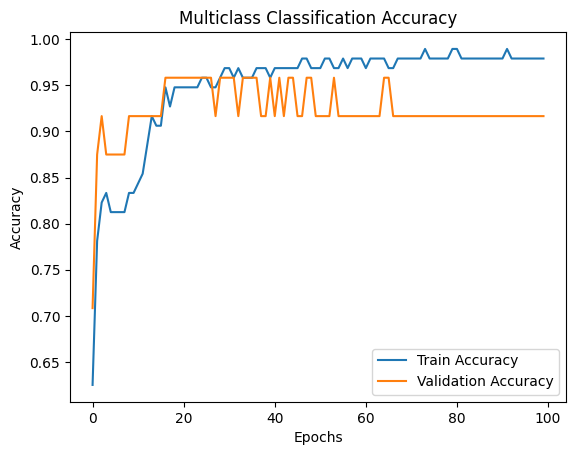

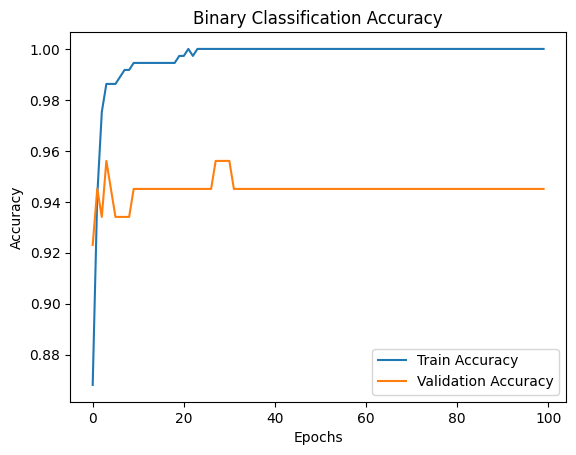

In [12]:
# For multiclass classification
plt.plot(history_multiclass.history['accuracy'], label='Train Accuracy')
plt.plot(history_multiclass.history['val_accuracy'], label='Validation Accuracy')
plt.title('Multiclass Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# For binary classification
plt.plot(history_binary.history['accuracy'], label='Train Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Validation Accuracy')
plt.title('Binary Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


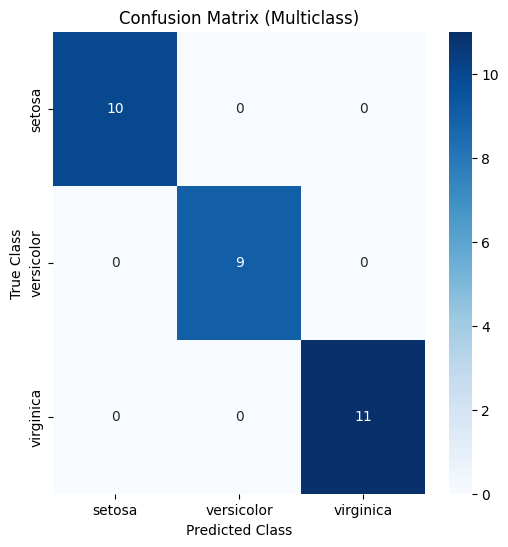

In [13]:
y_pred_multiclass = model_multiclass.predict(X_test)
y_pred_multiclass = np.argmax(y_pred_multiclass, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm_multiclass = confusion_matrix(y_test, y_pred_multiclass)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_multiclass, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix (Multiclass)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


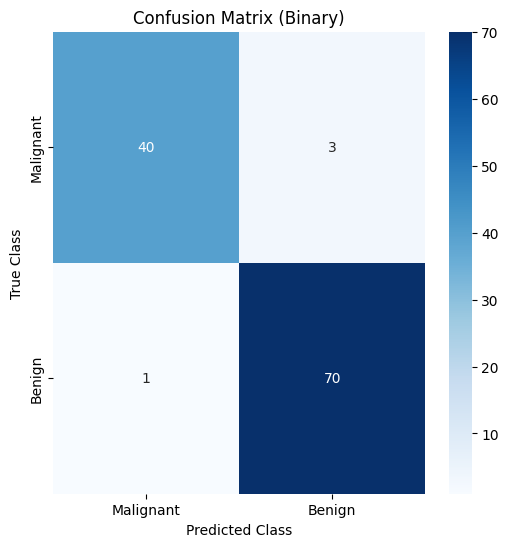

In [14]:
y_pred_binary = model_binary.predict(X_test_bc)
y_pred_binary = (y_pred_binary > 0.5).astype(int)  # Convert probabilities to class labels

# Compute confusion matrix
cm_binary = confusion_matrix(y_test_bc, y_pred_binary)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix (Binary)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()